In [7]:
import pandas as pd
import numpy as np
from ast import literal_eval

finished_df = pd.read_csv('finished_df.csv')

finished_df['label'] = finished_df['label'].apply(literal_eval)
finished_df['similarity_readme'] = finished_df['similarity_readme'].apply(literal_eval)
finished_df['embedding_readme'] = finished_df['embedding_readme'].apply(literal_eval)
finished_df['embedding_description'] = finished_df['embedding_description'].apply(literal_eval)
finished_df['similarity_description'] = finished_df['similarity_description'].apply(literal_eval)

finished_df['features'] = finished_df.apply(lambda row: np.concatenate((
    row['similarity_readme'],
    row['similarity_description']
)), axis=1)
X = np.stack(finished_df['features'].values)
y = np.stack(finished_df['label'].values)


In [18]:
finished_df

,readme,description,label,similarity_readme,embedding_readme,embedding_description,similarity_description,features
0,"<div align=""center"">\n <a href=""https://erp...",Free and Open Source Enterprise Resource Plann...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.704472303, 0.680462837, 0.686934054, 0.6914...","[0.005275495816022158, 0.0016473194118589163, ...","[0.013344024308025837, -0.04136915132403374, -...","[0.730091035, 0.716771781, 0.717300773, 0.7133...","[0.704472303, 0.680462837, 0.686934054, 0.6914..."
1,# Shopizer 3.X (for java 1.8 +) (tested with J...,Shopizer java e-commerce software,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.650998712, 0.639558434, 0.64419347, 0.65225...","[0.015184788964688778, -0.004053920973092318, ...","[-0.005936639849096537, -0.025300830602645874,...","[0.695208192, 0.677815557, 0.692538142, 0.6972...","[0.650998712, 0.639558434, 0.64419347, 0.65225..."
2,# Forecasting Best Practices \n\nTime series f...,Time Series Forecasting Best Practices & Examples,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.688421428, 0.666170418, 0.664308846, 0.6644...","[-0.006438827142119408, -0.011148449033498764,...","[-0.006866960786283016, -0.0164752509444952, 0...","[0.712537, 0.694466114, 0.709042907, 0.6910094...","[0.688421428, 0.666170418, 0.664308846, 0.6644..."
3,## Retail Store on Blockchain\n\n### About\n\n...,:moneybag: Retail Store that runs on Ethereum,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.688900411, 0.672290802, 0.676431954, 0.6837...","[0.004726836457848549, -0.0016325792530551553,...","[0.0011983871227130294, -0.029932500794529915,...","[0.694263697, 0.695543587, 0.69500947, 0.68075...","[0.688900411, 0.672290802, 0.676431954, 0.6837..."
4,# OpenPapyrus\n\nwww.petroglif.ru\n\n# En\n\n#...,"Sophisticated ERP, CRM, Point-Of-Sale, etc. Op...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.695667684, 0.694478452, 0.692077279, 0.6992...","[-0.011811600998044014, -0.012127534486353397,...","[0.007096695713698864, -0.02654082141816616, -...","[0.709582806, 0.704051375, 0.708634913, 0.7055...","[0.695667684, 0.694478452, 0.692077279, 0.6992..."
...,...,...,...,...,...,...,...,...
1141,# Twitter-Sentiment-Analysis--Canadian-Electio...,Sentiment Analysis is a branch of Natural Lang...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.69697684, 0.708603323, 0.709308088, 0.67899...","[-0.019504139199852943, 0.005664472468197346, ...","[-0.022425690665841103, 0.011576224118471146, ...","[0.706524193, 0.72264117, 0.717777967, 0.68509...","[0.69697684, 0.708603323, 0.709308088, 0.67899..."
1142,# Sandstorm Specification\n\nSandstorm is an o...,Specification for an Organizational Tool for P...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.679710329, 0.673943877, 0.676506281, 0.6838...","[-0.03203338757157326, -0.01878206618130207, -...","[-0.03142248094081879, -0.02207990549504757, -...","[0.724026442, 0.702139378, 0.709000409, 0.7079...","[0.679710329, 0.673943877, 0.676506281, 0.6838..."
1143,"{'message': 'Not Found', 'documentation_url': ...",Old Wordpress Theme for a Football Political o...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.619404256, 0.603838265, 0.61991024, 0.60296...","[-0.011292933486402035, -0.008167508989572525,...","[-0.0028935375157743692, -0.007212378084659576...","[0.696662664, 0.687835217, 0.69009912, 0.67802...","[0.619404256, 0.603838265, 0.61991024, 0.60296..."
1144,# Election Database Schema Design\nPerformance...,Performance of some analytics on real data fro...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.694772303, 0.692237318, 0.704166, 0.6893190...","[0.009400925599038601, 0.010601645335555077, -...","[-0.002663189545273781, -0.013983011245727539,...","[0.726267219, 0.711455882, 0.731821477, 0.7124...","[0.694772303, 0.692237318, 0.704166, 0.6893190..."


In [16]:
labels = [np.where(row == 1)[0][0] if 1 in row else -1 for row in y]
labels

[6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,


In [3]:
distinct_count = len(set(labels))


In [8]:
import pandas as pd

embedding_readme = np.stack(finished_df['embedding_readme'].values)
embedding_description = np.stack(finished_df['embedding_description'].values)

embeddings = np.concatenate((embedding_readme, embedding_description), axis=1)

In [9]:
embeddings.shape

(1146, 3072)

In [10]:
classes=np.arange(21)

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
embeddings_scaled = StandardScaler().fit_transform(embeddings)


In [13]:
embeddings_scaled.shape

(1146, 3072)

In [14]:
import umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(1146, 2)


Text(0.5, 1.0, 'Embedded via UMAP using Labels')

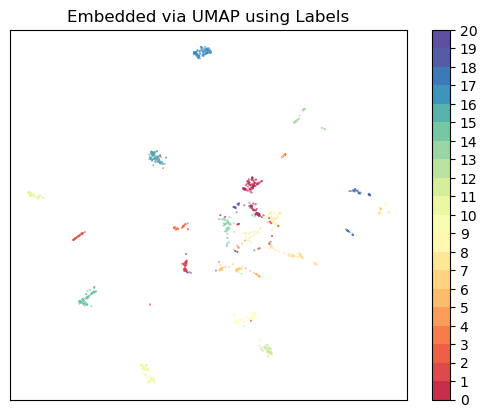

In [17]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(embeddings_scaled, y=labels)
print(embedding.shape)
fig, ax = plt.subplots()

plt.scatter(*embedding.T, s=0.1, c=labels, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
plt.title('Embedded via UMAP using Labels')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(1146, 2)


Text(0.5, 1.0, 'Embedded via UMAP using Labels')

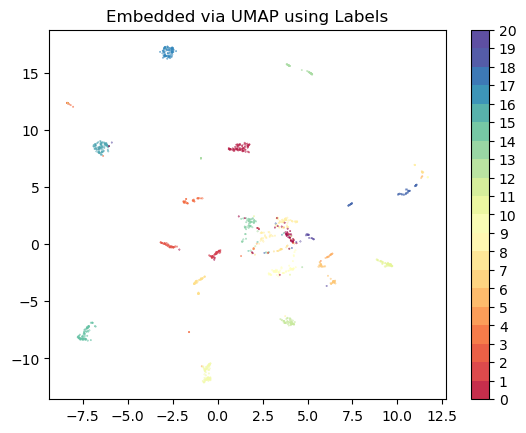

In [13]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(embeddings_scaled, y=labels)
print(embedding.shape)
plt.scatter(*embedding.T, s=0.1, c=labels, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
plt.title('Embedded via UMAP using Labels')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(1146, 2)


Text(0.5, 1.0, 'Embedded via UMAP using Labels')

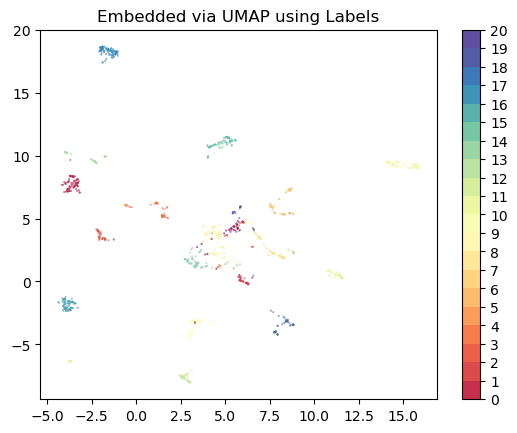

In [14]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
embedding = reducer.fit_transform(embeddings_scaled, y=labels)
print(embedding.shape)
plt.scatter(*embedding.T, s=0.1, c=labels, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
plt.title('Embedded via UMAP using Labels')


In [15]:
reducer = umap.UMAP(random_state=42)
reducer.fit(embeddings_scaled, labels)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/davidhuang/anaconda3/envs/weather-research/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [16]:
embedding = reducer.transform(embeddings_scaled)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1146, 2)

Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

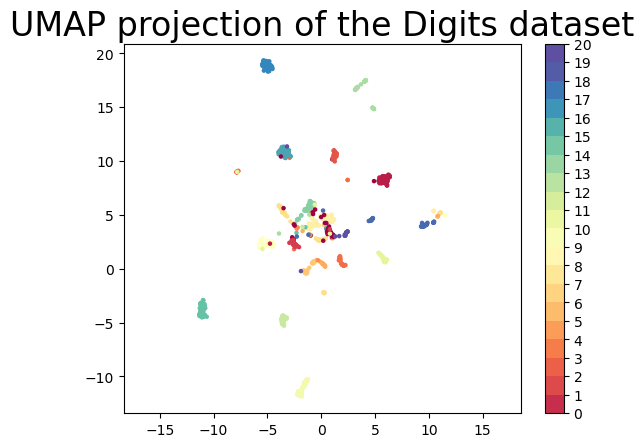

In [17]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(21)).set_ticks(np.arange(21))
plt.title('UMAP projection of the Digits dataset', fontsize=24)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings_scaled, y, test_size=0.35, random_state=42)


In [19]:
embeddings_scaled.shape

(1146, 3072)

In [20]:
train_labels = [np.where(row == 1)[0][0] if 1 in row else -1 for row in y_train]
test_labels = [np.where(row == 1)[0][0] if 1 in row else -1 for row in y_test]


In [21]:
mapper = umap.UMAP(n_neighbors=15, n_components=250, metric='cosine').fit(X_train, train_labels)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [22]:
test_embedding = mapper.transform(X_test)


TypeError: scatter() got multiple values for argument 's'

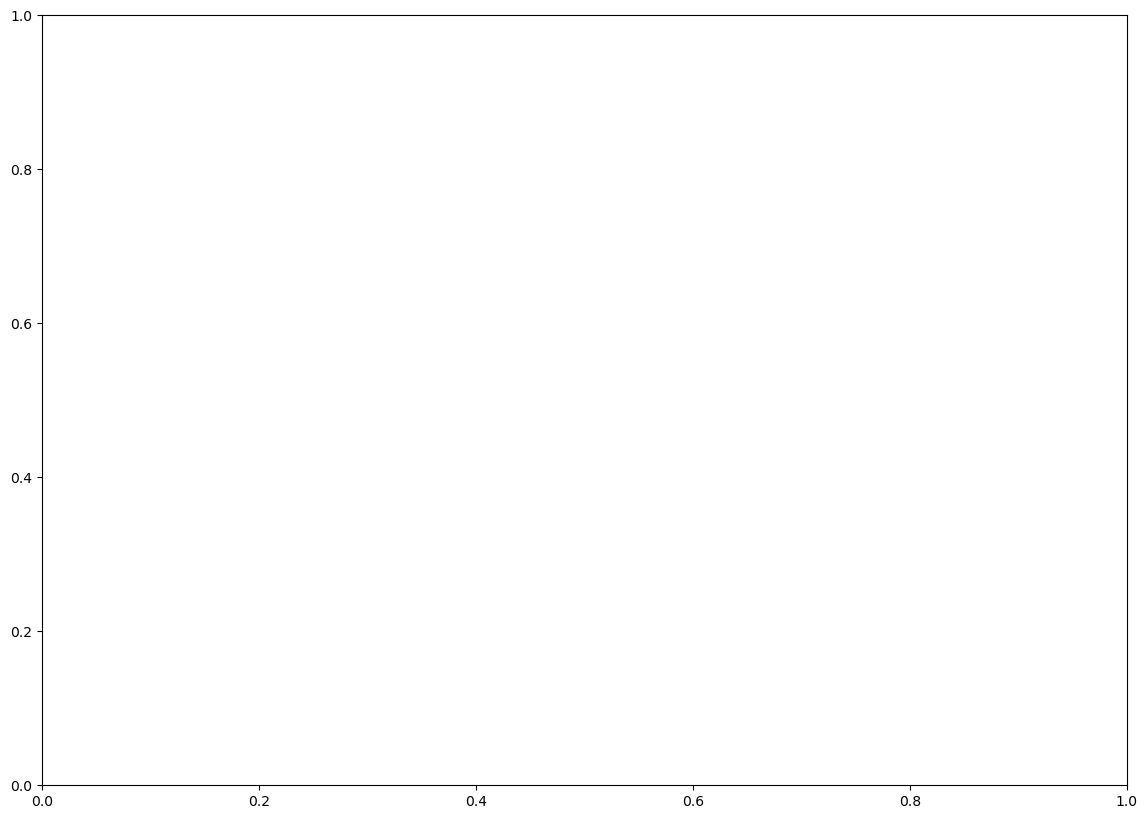

In [23]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper.embedding_.T, s=0.3, c=np.array(train_labels), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
cbar.set_ticklabels(classes)
plt.title('Trained Embedded via UMAP Transform')

TypeError: scatter() got multiple values for argument 's'

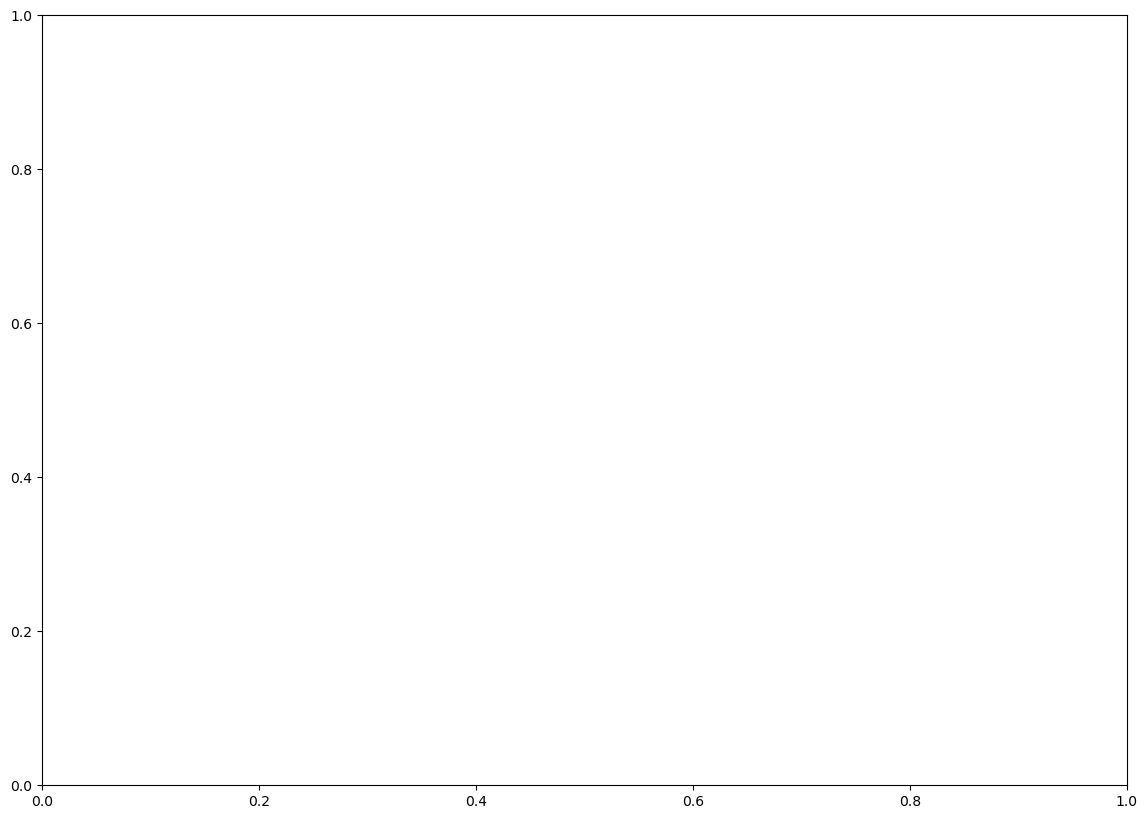

In [24]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*test_embedding.T, s=2, c=np.array(test_labels), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
plt.title('Fashion MNIST Test Digits Embedded via UMAP')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(mapper.embedding_)
X_test = scaler.transform(test_embedding)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9502688172043011
0.7139303482587065


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(mapper.embedding_)
X_test = scaler.transform(test_embedding)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9381720430107527
0.7139303482587065


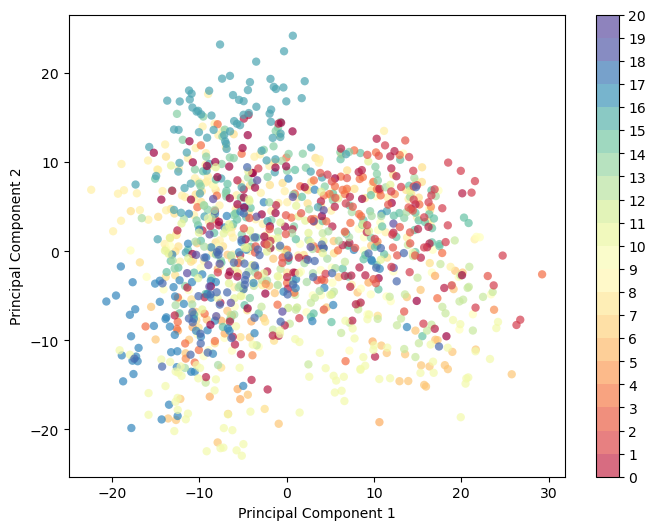

In [ ]:
# PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X is your feature matrix
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings_scaled)

# Plotting the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, edgecolor='none', alpha=0.7, cmap='Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
plt.show()


In [3]:
import pandas as pd
import numpy as np
from ast import literal_eval

keyBERT = pd.read_csv('/Users/davidhuang/Downloads/keyBERT.csv')
keyBERT.columns


Index(['Readmes', 'Labels', 'embeddings', 'embeddings_readme',
       'embeddings_description'],
      dtype='object')

In [ ]:
keyBERT["Readmes"]

,Readmes,Labels,embeddings,embeddings_readme,embeddings_description
0,# Awesome Agriculture [![Awesome](https://awes...,11,[[-1.75531264e-02 -4.41035330e-02 3.42451967e...,[-1.75531264e-02 -4.41035330e-02 3.42451967e-...,[-9.42627341e-02 4.83560190e-02 -7.86660910e-...
1,# farmOS\n\n[![Licence](https://img.shields.io...,11,[[-1.02068745e-01 7.22626597e-02 2.75674760e...,[-1.02068745e-01 7.22626597e-02 2.75674760e-...,[-9.42627341e-02 4.83560190e-02 -7.86660910e-...
2,# End Official Support and Maintenance for Tan...,11,[[ 8.87548644e-03 1.92318801e-02 -7.99589753e...,[ 8.87548644e-03 1.92318801e-02 -7.99589753e-...,[-9.42627341e-02 4.83560190e-02 -7.86660910e-...
3,# FarmVibes.AI: Multi-Modal GeoSpatial ML Mode...,11,[[-2.44716872e-02 -1.25990361e-01 4.21432890e...,[-2.44716872e-02 -1.25990361e-01 4.21432890e-...,[-9.42627341e-02 4.83560190e-02 -7.86660910e-...
4,# AgroChain\n\nThis repository contains the co...,11,[[-7.02116638e-02 1.10249140e-03 -1.94804911e...,[-7.02116638e-02 1.10249140e-03 -1.94804911e-...,[-9.42627341e-02 4.83560190e-02 -7.86660910e-...
...,...,...,...,...,...
87,"<p align=""center"">\n<img src=https://img.shiel...",72,[[-5.27037084e-02 1.65137947e-02 -6.49410635e...,[-5.27037084e-02 1.65137947e-02 -6.49410635e-...,[ 6.21975474e-02 1.07590124e-01 -1.05632760e-...
88,"""[![License: CC0-1.0](https://img.shields.io/b...",92,[[-4.02409211e-02 -1.06749246e-02 -8.39186460e...,[-4.02409211e-02 -1.06749246e-02 -8.39186460e-...,[ 1.29818905e-03 5.36202751e-02 -6.85720742e-...
89,"""![](https://img.shields.io/badge/Built%20with...",92,[[-7.94440210e-02 4.72403429e-02 -2.26997975e...,[-7.94440210e-02 4.72403429e-02 -2.26997975e-...,[ 1.29818905e-03 5.36202751e-02 -6.85720742e-...
90,"\n<p align = ""center"">\n <img src = ""https://...",92,[[-9.92611051e-02 7.62028545e-02 -9.35439318e...,[-9.92611051e-02 7.62028545e-02 -9.35439318e-...,[ 1.29818905e-03 5.36202751e-02 -6.85720742e-...


In [ ]:
labels = ['11', '21', '22', '23', '31-33', '42', '44-45', '48-49', '51', '52', '53', '54', '55', '56', '61', '62', '71', '72', '81', '92']

columns = labels
df = pd.DataFrame(columns=columns)

for i, sample_prediction in enumerate(keyBERT['Labels'].values):
    row = [0] * len(labels)

    if sample_prediction in labels:
        row[columns.index(sample_prediction)] = 1

    df.loc[i] = row

predicted_labels = df

In [ ]:
predicted_labels

,11,21,22,23,31-33,42,44-45,48-49,51,52,53,54,55,56,61,62,71,72,81,92
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
predicted_labels['Labels_encoded'] = predicted_labels.apply(lambda row: np.array(row), axis=1)
predicted_labels["Labels_encoded"]

0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                            ...                        
87    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
88    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
89    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
90    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
91    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Labels_encoded, Length: 92, dtype: object

In [ ]:
labels = predicted_labels["Labels_encoded"].to_numpy

In [ ]:
actual_labels = [np.where(row == 1)[0][0] if 1 in row else -1 for row in predicted_labels["Labels_encoded"]]

In [ ]:
import numpy as np

def string_to_numpy_array(array_string):
    # Remove the brackets and split the string by spaces
    array_elements = array_string.strip('[]').replace('\n', ' ').split()

    # Convert the string elements to floats and create a numpy array
    return np.array([float(element) for element in array_elements])

In [ ]:
keyBERT['embeddings_readme'] = keyBERT['embeddings_readme'].apply(string_to_numpy_array)
keyBERT['embeddings_description'] = keyBERT['embeddings_description'].apply(string_to_numpy_array)


In [ ]:
embedding_readme = np.stack(keyBERT['embeddings_readme'].values)
embedding_description = np.stack(keyBERT['embeddings_description'].values)

embeddings = np.concatenate((embedding_readme, embedding_description), axis=1)

In [ ]:
embeddings.shape

(92, 768)

In [ ]:
labels

<bound method IndexOpsMixin.to_numpy of 0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                            ...                        
87    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
88    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
89    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
90    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
91    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Labels_encoded, Length: 92, dtype: object>

In [ ]:

embeddings_scaled_keyBERT = StandardScaler().fit_transform(embeddings)


In [ ]:
x = np.array([[[1, 2, 3], [1, 2, 3]]])
x.shape

(1, 2, 3)

In [ ]:
embeddings_scaled_keyBERT.shape

(92, 768)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(92, 2)


Text(0.5, 1.0, 'Embedded via UMAP using Labels')

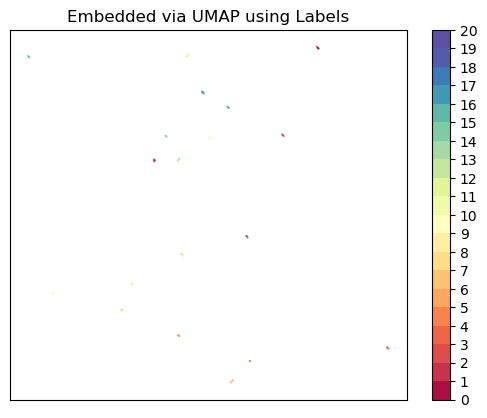

In [ ]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(embeddings_scaled_keyBERT, y=actual_labels)
print(embedding.shape)
fig, ax = plt.subplots()

plt.scatter(*embedding.T, s=0.1, c=actual_labels, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
plt.title('Embedded via UMAP using Labels')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(92, 2)


Text(0.5, 1.0, 'Embedded via UMAP using Labels')

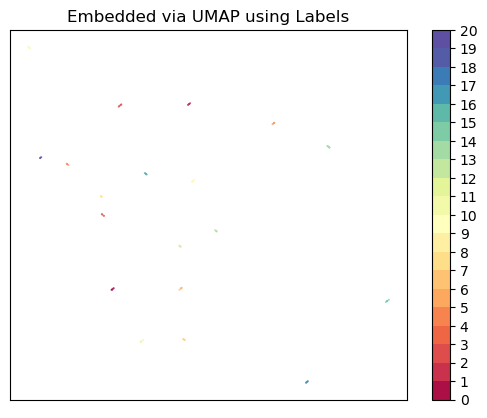

In [ ]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
embedding = reducer.fit_transform(embeddings_scaled_keyBERT, y=actual_labels)
print(embedding.shape)
fig, ax = plt.subplots()

plt.scatter(*embedding.T, s=0.1, c=actual_labels, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
plt.title('Embedded via UMAP using Labels')


In [ ]:
embedding.T.shape

(2, 92)

In [ ]:
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings_scaled_keyBERT, actual_labels, test_size=0.2, random_state=42)

mapper = umap.UMAP(n_neighbors=15, n_components=20, metric='cosine').fit(X_train, y_train)

test_embedding = mapper.transform(X_test)
#fig, ax = plt.subplots(1, figsize=(14, 10))
#plt.scatter(*mapper.embedding_.T, s=0.3, c=np.array(y_train), cmap='Spectral', alpha=1.0)
#plt.setp(ax, xticks=[], yticks=[])
#cbar = plt.colorbar(boundaries=np.arange(21))
#cbar.set_ticks(np.arange(21))
#cbar.set_ticklabels(classes)
#plt.title('Trained Embedded via UMAP Transform')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0.5, 1.0, 'Fashion MNIST Test Digits Embedded via UMAP')

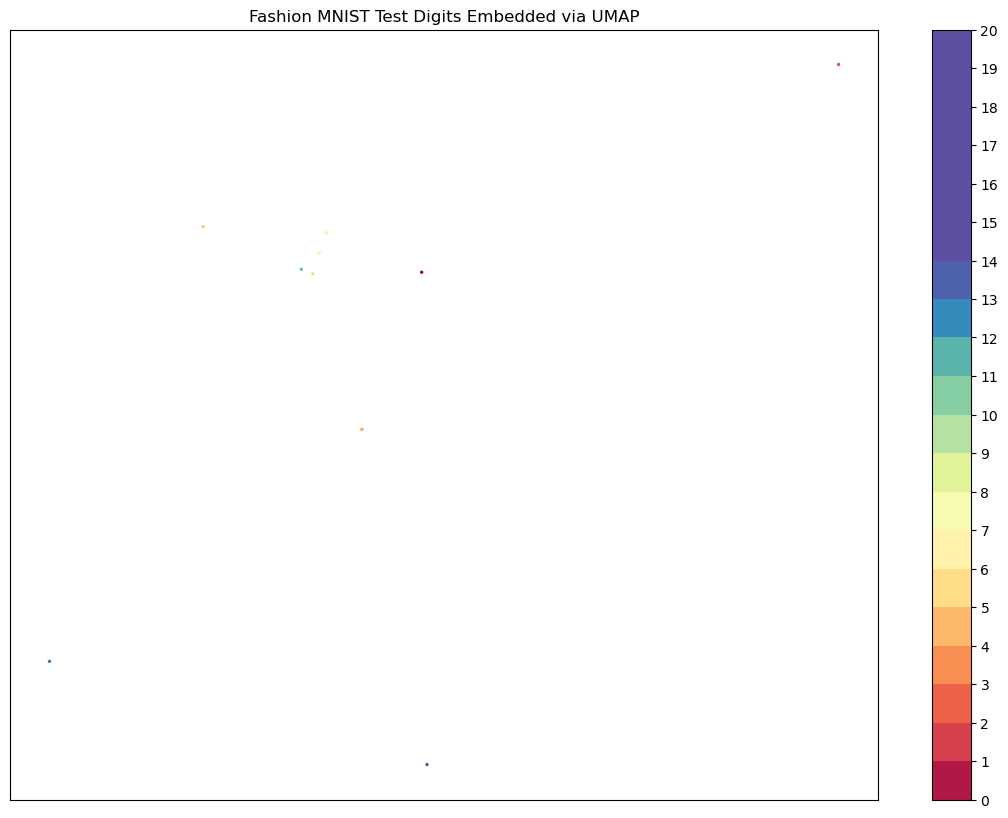

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*test_embedding.T, s=2, c=np.array(y_test), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(21))
cbar.set_ticks(np.arange(21))
plt.title('Fashion MNIST Test Digits Embedded via UMAP')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(mapper.embedding_)
X_test = scaler.transform(test_embedding)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7894736842105263


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(embedding, actual_labels, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))


1.0


In [ ]:
x = range(99-2, -1, -1)

In [ ]:
for i in x: 
    print(i)

NameError: name 'x' is not defined

In [ ]:
for time_step in reversed(np.arange(1, 99)):
    print(time_step)


98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [ ]:
embedding.shape

(92, 2)

In [4]:
import pandas as pd
from umap import UMAP
from sklearn.pipeline import make_pipeline 

# pip install "embetter[text]"

#from embetter.text import SentenceEncoder

# Build a sentence encoder pipeline with UMAP at the end.
#text_emb_pipeline = make_pipeline(
#  SentenceEncoder('all-MiniLM-L6-v2'),
 # UMAP()
# )



# Load sentences
# sentences = list(pd.read_csv("original.csv")['sentences'])

# Calculate embeddings 
# X_tfm = text_emb_pipeline.fit_transform(sentences)

# Write to disk. Note! Text column must be named "text"
df = pd.DataFrame({"text": keyBERT["description"]})
df['x'] = embedding[:, 0]
df['y'] = embedding[:, 1]
df.to_csv("ready.csv", index=False)

NameError: name 'embedding' is not defined

In [20]:
import pandas as pd
from umap import UMAP
from sklearn.pipeline import make_pipeline 

# pip install "embetter[text]"

#from embetter.text import SentenceEncoder

# Build a sentence encoder pipeline with UMAP at the end.
#text_emb_pipeline = make_pipeline(
#  SentenceEncoder('all-MiniLM-L6-v2'),
 # UMAP()
# )



# Load sentences
# sentences = list(pd.read_csv("original.csv")['sentences'])

# Calculate embeddings 
# X_tfm = text_emb_pipeline.fit_transform(sentences)

# Write to disk. Note! Text column must be named "text"
df = pd.DataFrame({"text": finished_df["description"]})
df['x'] = embedding[:, 0]
df['y'] = embedding[:, 1]
df.to_csv("ready.csv", index=False)